# 9 主成分分析

假设 $x \in\mathbb R^m$ 是 $m$ 维随机变量 (向量). 期望为 $\mu = \mathbb E(x)\in\mathbb R^m$, 协方差为 $\Sigma  = {\rm Cov}(x)$.

考虑**正交**线性变换 $y = Q^Tx$, 其中矩阵 $ Q^T\in\mathbb R^{k\times m}, \ Q^TQ = I_k\ (k\leqslant m)$, 以及 $y\in\mathbb R^k$.

如下求解 $Q$ 使得 $y$ 的协方差 [**最大**](https://stats.stackexchange.com/questions/305430/why-do-we-want-to-maximize-the-variance-in-principal-component-analysis), 则为主成分分析 (principal component analysis, PCA):
$${\rm argmax}_{Q^TQ = I_k}{\rm Var}(y)$$

向量 $Q^Tx$ 是 $x$ 的前 $k$ 个主成分

## 主成分分析

可以解出, 所求极值点对应的 $Q$ 是 $\Sigma$ 的最大的 $k$ 个单位特征向量.

**证明** 
$${\rm Var}(y) = \mathbb E\left[\left(y - \mathbb Ey\right)^T\left(y - \mathbb Ey\right)\right]
=   {\rm tr}\mathbb E\left[\left(y - \mathbb Ey\right)\left(y - \mathbb Ey\right)^T\right]
={\rm tr}{\rm Cov}(y) = {\rm tr}(Q^T\Sigma Q).$$

根据樊畿迹极大极小定理 (Kyfan's trace minimization theorem) [1] p. 248), 使得上式最大的 $Q$ 是 $\Sigma$ 的最大的 $k$ 个特征向量.

<br>

设 $\Sigma$ 的特征值为 $\lambda_1\geqslant \lambda_2\geqslant \dotsc\geqslant\lambda_m$, 对应的单位特征向量为 $q_1,q_2,\dotsc,q_m$. 则不妨设 $Q = [q_1,q_2,\dotsc,q_k]$, 及 $y = [q_1^Tx, q_2^Tx,\dotsc,q_k^Tx]$. 则称 $y_i = q_i^Tx$ 为 $x$ 的第 $i$ 个主成分.

### 样本主成分分析

先用样本估计 $x$ 的期望与协方差矩阵: $\hat \mu,\hat \Sigma$, 然后进行主成分分析: 假设有 $n$ 条数据 $x_1,\dotsc,x_n$, 则

$$\hat\mu = \frac 1n\sum_{i=1}^n x_i\quad\quad \hat \Sigma = \frac {1}{n-1} \sum_{i=1}^n (x_i - \hat\mu)(x_i - \hat \mu)^T$$

容易看出对应的正交变换 $Q$ 是 $X$ 中心化之后的右奇异向量, PCA 即为奇异值分解.

<br>

注: 前文脱离样本使用 $\mu,\Sigma$ 的主成分分析称为总体主成分分析.


In [19]:
import numpy as np
from sklearn.datasets import load_digits

X = load_digits()['data']

mean = np.mean(X, axis = 0, keepdims = True)
cov = ((X - mean).T @ (X - mean))  / (X.shape[0] - 1)
eigs, eigv = np.linalg.eigh(cov)

# sort eigenvalues from large to small
eigs, eigv = eigs[::-1], eigv[:,::-1]
principal = (X - mean) @ eigv

In [ ]:
# compare PCA with SVD (up to a scaling)
print(((eigs * (X.shape[0] - 1)    -    np.linalg.svd(X - mean)[1] ** 2) ** 2).max())

## 贡献率



### 因子负荷量

相关系数 $\rho(y_j,x_i) = {\rm Corr}(y_j, x_i)\in\mathbb R$ 称为因子负荷量. 其中 $y_j,x_i$ 分别为向量 $y,x$ 的 $j$, $i$ 个分量.


### 方差贡献率

设 $\Sigma$ 的特征值为 $\lambda_1\geqslant \lambda_2\geqslant \dotsc\geqslant\lambda_m$, 则第 $k$ 个主成分的方差贡献率为 
$\dfrac{\lambda_k}{\sum_{j=1}^m\lambda_j}$. 前 $k$ 个累计方差贡献率则为 $\dfrac{\sum_{j=1}^k\lambda_k}{\sum_{j=1}^m\lambda_j}$.

可以将每个主成分的方差贡献率 (从大到小) 画出来, 形成崖底碎石图 (scree plot).


<font color=red>**PCA一定要先将数据标准化去除量纲影响，否则会影响计算贡献率！！**</font>

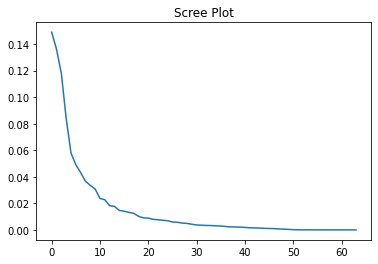

In [20]:
from matplotlib import pyplot as plt 
contribution = eigs / eigs.sum()
plt.plot(contribution)
plt.title('Scree Plot')
plt.show()

## 参考文献

1. Roger A. Horn and Charles R. Johnson, Matrix Analysis (Second Edition), Cambridge University Press, 2013.